In [109]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df= pd.read_csv('temp.csv')

In [111]:
df['Datum'] = pd.to_datetime(df['Datum'],format='%Y-%m-%d')
df['day'] = df['Datum'].dt.day
df['weekday'] = df['Datum'].dt.weekday
df['month'] = df['Datum'].dt.month

In [112]:
df.drop(columns = ['Datum','Datum_yes2'],inplace = True)

In [113]:
df.isnull().any().any()

False

In [114]:
df = df.rename(columns = {'Aantal':'Coronavirus_Anatal','Provincie_aantal':'Provincie_Coronavirus_Aantal',
           'Aantal_yes':'Coronavirus_Anatal_Yesterday','Provincie_aantal_yes':'Provincie_Coronavirus_Aantal_Yes',
           'Aantal_y':'Coronavirus_Aantal_yes2','Provincie_aantal_yes2':'Provincie_Coronavirus_aantal_yes2',
           'Aantal_yes3':'Coronavirus_Anatal_yes3','Provincie_aantal_yes3':'Provincie_Coronavirus_Aantal_yes3',
           'record_count':'Health_Organization_Amount','doc_record_count':'Health_Doc_Amount',
           'day':'Coronavirus_Day','weekday':'Coronavirus_Weekday','month':'Coronavirus_Month'})

In [115]:
df.columns

Index(['Gemeentenaam', 'Provincienaam', 'Coronavirus_Anatal', 'Provincie_Coronavirus_Aantal', 'Coronavirus_Anatal_Yesterday', 'Provincie_Coronavirus_Aantal_Yes', 'Coronavirus_Aantal_yes2', 'Provincie_Coronavirus_aantal_yes2', 'Coronavirus_Anatal_yes3', 'Provincie_Coronavirus_Aantal_yes3', 'outbreak_days', 'high_temp_degree', 'low_temp_degree', 'hist_Gemiddeld_degree_low', 'hist_Gemiddeld_degree_high', 'Gemeenten2016_Bevolking', 'Gemeenten2016_Beweegrichtlijnen', 'Gemeenten2016_Eenzaam', 'Gemeenten2016_Ernstig_zeerernstigeenzaam', 'Gemeenten2016_Ernstigehinderspoorwegen', 'Gemeenten2016_Ernstigehindervliegtuigen', 'Gemeenten2016_Ernstigehinderwegenless_than_50km_u', 'Gemeenten2016_Ernstigehinderwegenmore_than_50km_u', 'Gemeenten2016_Gehoorbeperking', 'Gemeenten2016_Gezichtsbeperking', 'Gemeenten2016_Goed_zeergoedervarengezondheid', 'Gemeenten2016_Hoogrisicoopangstofdepressie', 'Gemeenten2016_Langdurigeziekteofaandoening', 'Gemeenten2016_Mantelzorger',
       'Gemeenten2016_Mantelzorgont

# Data explanation:

Coronavirus data in netherlandas are collected from [rivm_NL_covid19_total_municipality.csv](https://github.com/J535D165/CoronaWatchNL/blob/master/data/rivm_NL_covid19_total_municipality.csv), which contains 'Datum','Gemeentenaam','Gemeentecode,'Provincienaam', and 'Aantal' fields.  Aantal field is renamed into Coronavirus_Anatal. Through feature engineering, some new features are created: 

| New Features  | Explanation |
| -------- | --------|
| Coronavirus_Anatal_Yesterday    |  infected numbers at yesterday  |
| Coronavirus_Aantal_yes2     | infected numbers at the day before yesterday  | 
| Coronavirus_Anatal_yes3     | infected numbers 3 days ago | 
| Provincie_Coronavirus_Aantal | infected patient number in the province level   |
| Provincie_Coronavirus_Aantal_Yes     | infected numbers at yesterday in the province level  | 
| Provincie_Coronavirus_aantal_yes2     | infected numbers 2 days ago in the province level  | 
| Provincie_Coronavirus_Aantal_yes3     | infected numbers 3 days ago in the province level  | 
| outbreak_days     | current date - the first patient infected date (2020-02-27) | 
| Coronavirus_Day     | The day of 'Datum', s.t. for 'Datum' 2020-02-27, Coronavirus_Day=27   | 
| Coronavirus_Weekday     | The week day of 'Datum', s.t. sunday=0| 
| Coronavirus_Month     | The month of 'Datum'  | 


Weather data is colllected form [accuweather](https://www.accuweather.com/) for each municipalities and date (from feb to now, which is april).

| Feature name  | Explanation |
| -------- | --------|
| high_temp_degree    |  highest temperature in that date  |
| low_temp_degree    |  lowest temperature in that date  |
| hist_Gemiddeld_degree_low    |  averaged highest temperature history  |
| hist_Gemiddeld_degree_high    |  averaged lowest temperature history  |


Data are also collected from [rivm](https://www.rivm.nl/). Features are named starting with ''gemeenten2016'.

Info about heathcare organization and providers (s.t. dentists, nurses,pharmacists etc) are also collected from [zorgkaartnederland](https://www.zorgkaartnederland.nl/). 

| Feature name  | Explanation |
| -------- | --------|
| Health_Organization_Amount    |  How many healthcare organization in each municipality|
| Health_Doc_Amount    |  How many healthcare providers in each municipality  |
   

# Linear relationship (correlation)

coronavirus_aantal has a weak positive linear relationshap with some features, which are: `
'Provincie_coronavirus_aantal','Coronavirus_anatal_yes2','Coronavirus_anatal_yes3','outbreak_days',
'high_temp_degree','hist_Gemiddeld_degree_low','hist_Gemiddeld_degree_high','Gemeenten2016_Bevolking',
'health_organization_amount','heath_doc_amount','coronavirus_Month'`

Positive relationship means 

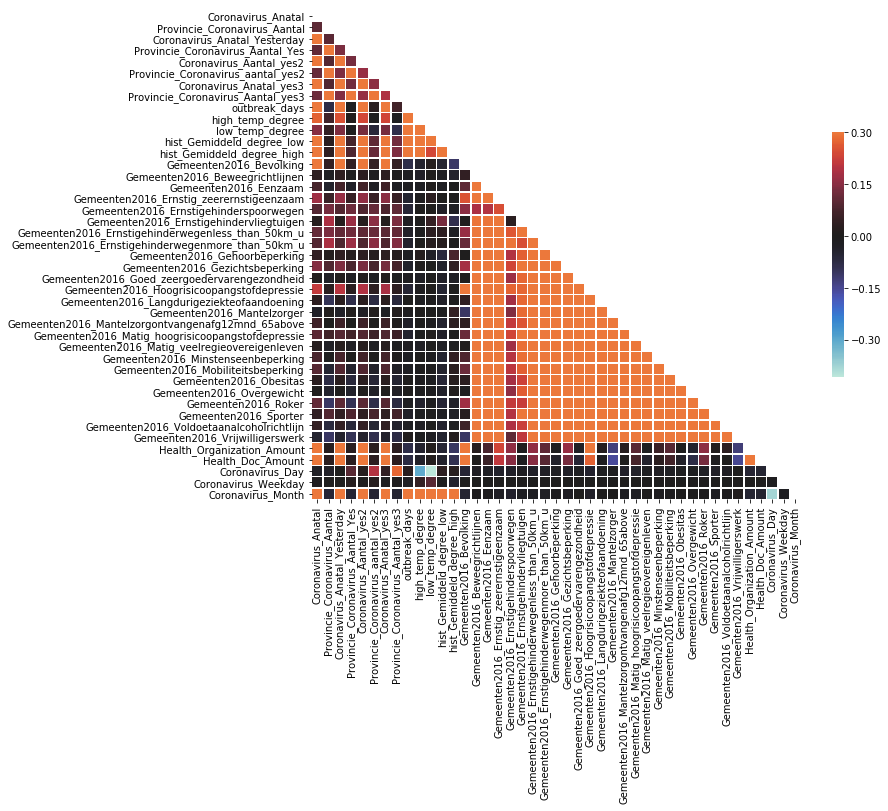

In [116]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # cmap=cmap,

# Non-linear relationship 
Feature importance from RandForest and Permutation Importance.

In [117]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [118]:
y = df['Coronavirus_Anatal']
X = df.drop(columns = ['Coronavirus_Anatal'])

rng = np.random.RandomState(seed=42)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

categorical_columns = ['Gemeentenaam','Provincienaam']
numerical_columns = ['Provincie_Coronavirus_Aantal', 'Coronavirus_Anatal_Yesterday', 'Provincie_Coronavirus_Aantal_Yes', 'Coronavirus_Aantal_yes2', 'Provincie_Coronavirus_aantal_yes2', 'Coronavirus_Anatal_yes3', 'Provincie_Coronavirus_Aantal_yes3', 'outbreak_days', 'high_temp_degree', 'low_temp_degree', 'hist_Gemiddeld_degree_low', 'hist_Gemiddeld_degree_high', 'Gemeenten2016_Bevolking', 'Gemeenten2016_Beweegrichtlijnen', 'Gemeenten2016_Eenzaam', 'Gemeenten2016_Ernstig_zeerernstigeenzaam', 'Gemeenten2016_Ernstigehinderspoorwegen', 'Gemeenten2016_Ernstigehindervliegtuigen', 'Gemeenten2016_Ernstigehinderwegenless_than_50km_u', 'Gemeenten2016_Ernstigehinderwegenmore_than_50km_u', 'Gemeenten2016_Gehoorbeperking', 'Gemeenten2016_Gezichtsbeperking', 'Gemeenten2016_Goed_zeergoedervarengezondheid', 'Gemeenten2016_Hoogrisicoopangstofdepressie', 'Gemeenten2016_Langdurigeziekteofaandoening', 'Gemeenten2016_Mantelzorger',
       'Gemeenten2016_Mantelzorgontvangenafg12mnd_65above', 'Gemeenten2016_Matig_hoogrisicoopangstofdepressie', 'Gemeenten2016_Matig_veelregieovereigenleven', 'Gemeenten2016_Minstenseenbeperking', 'Gemeenten2016_Mobiliteitsbeperking', 'Gemeenten2016_Obesitas', 'Gemeenten2016_Overgewicht', 'Gemeenten2016_Roker', 'Gemeenten2016_Sporter', 'Gemeenten2016_Voldoetaanalcoholrichtlijn', 'Gemeenten2016_Vrijwilligerswerk', 
        'Health_Organization_Amount', 'Health_Doc_Amount', 'Coronavirus_Day', 'Coronavirus_Weekday', 'Coronavirus_Month']


X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42) #stratify=y

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', AdaBoostRegressor(random_state=42,n_estimators=50))
])
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

In [119]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("explained_variance",explained_variance_score(y_train, rf.predict(X_train)))
print("max_error",max_error(y_train,  rf.predict(X_train)))
print("mean absolute error:",mean_absolute_error(y_train, rf.predict(X_train)))
print("mean squared：",mean_squared_error(y_train, rf.predict(X_train)))
print("medain absolute error:",median_absolute_error(y_train, rf.predict(X_train)))
print("r2 (coefficient of determination) score:",r2_score(y_train, rf.predict(X_train)))

explained_variance 0.904008790504982
max_error 113.42501464557702
mean absolute error: 44.65014429254252
mean squared： 2342.905206466241
medain absolute error: 51.33466267863077
r2 (coefficient of determination) score: 0.7345364525245464


In [120]:
y_train.describe()

count    9152.000000
mean       46.732408
std        93.950401
min         1.000000
25%         5.000000
50%        21.000000
75%        53.000000
max      1661.000000
Name: Coronavirus_Anatal, dtype: float64

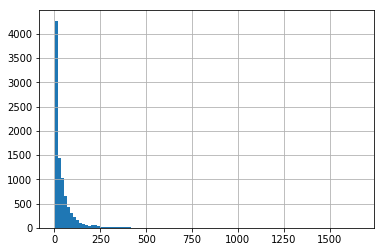

In [121]:
y_train.hist(bins=100)

In [122]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.735
RF test accuracy: 0.795


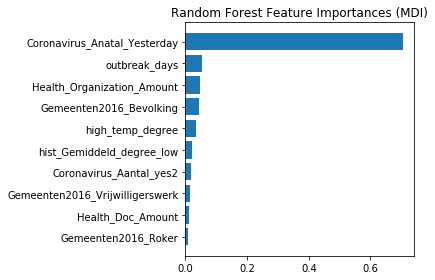

In [123]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['regressor'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))[-10:]
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx][-10:,])
ax.set_yticklabels(feature_names[sorted_idx][-10:,])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

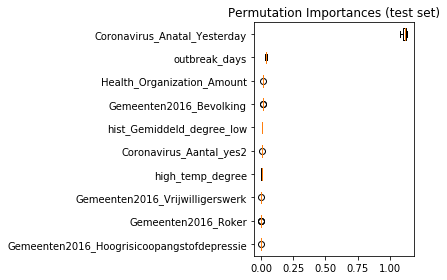

In [124]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T[:,-10:],
           vert=False, labels=X_test.columns[sorted_idx][-10:])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

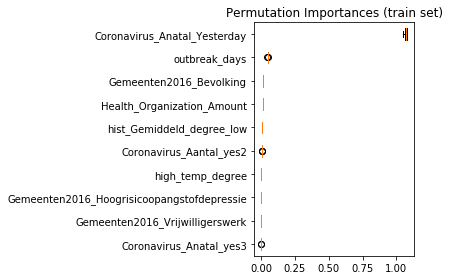

In [125]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T[:,-10:],
           vert=False, labels=X_train.columns[sorted_idx][-10:])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

# Other dataset 
## Collecting data from [zorgkaartnederland](https://www.zorgkaartnederland.nl/)